<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [50]:
mu, sigma, N = 163, 10, 10000
h_samples = np.random.normal(mu, sigma, N)

assert round(np.mean(h_samples)), 163
assert round(np.std(h_samples)), 10

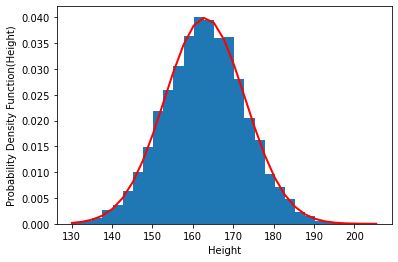

In [51]:
count, bins, ignored = plt.hist(x = h_samples, bins = 30, density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth = 2, color = 'r')
plt.xlabel('Height')
plt.ylabel('Probability Density Function(Height)')
plt.show()

$
p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}exp^{-\frac{1}{2}{(\frac{x-\mu}{\sigma}})^2}
$

In [52]:
def normal_dist(x, mu, sigma):
  '''
  Probability Distribution Function
  '''
  z = (x - mu)/sigma
  px = (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-(z**2)/2)
  return px

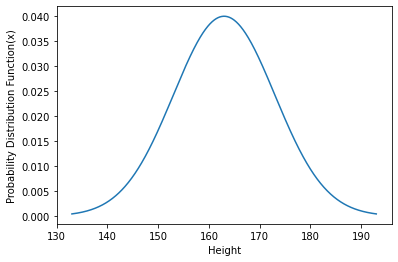

In [53]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)

plt.figure()
plt.plot(x, normal_dist(x, mu, sigma))
plt.xlabel('Height')
plt.ylabel('Probability Distribution Function(x)')
plt.show()

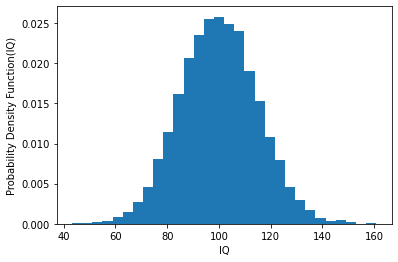

In [58]:
iq_samples = np.random.normal(100, 15, 10000)
plt.figure()
plt.hist(x = iq_samples, bins = 30, density = True)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function(IQ)')
plt.show()

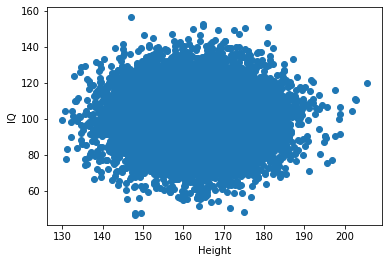

In [55]:
plt.figure()
plt.scatter(x = h_samples, y = iq_samples)
plt.xlabel('Height')
plt.ylabel('IQ')
plt.show()

* Mean vector: µ = (163, 100)
* Standard deviation vector: σ = (10, 15)
* Lower bound: l = (140, 80)
* Upper bound: u = (180, 150)

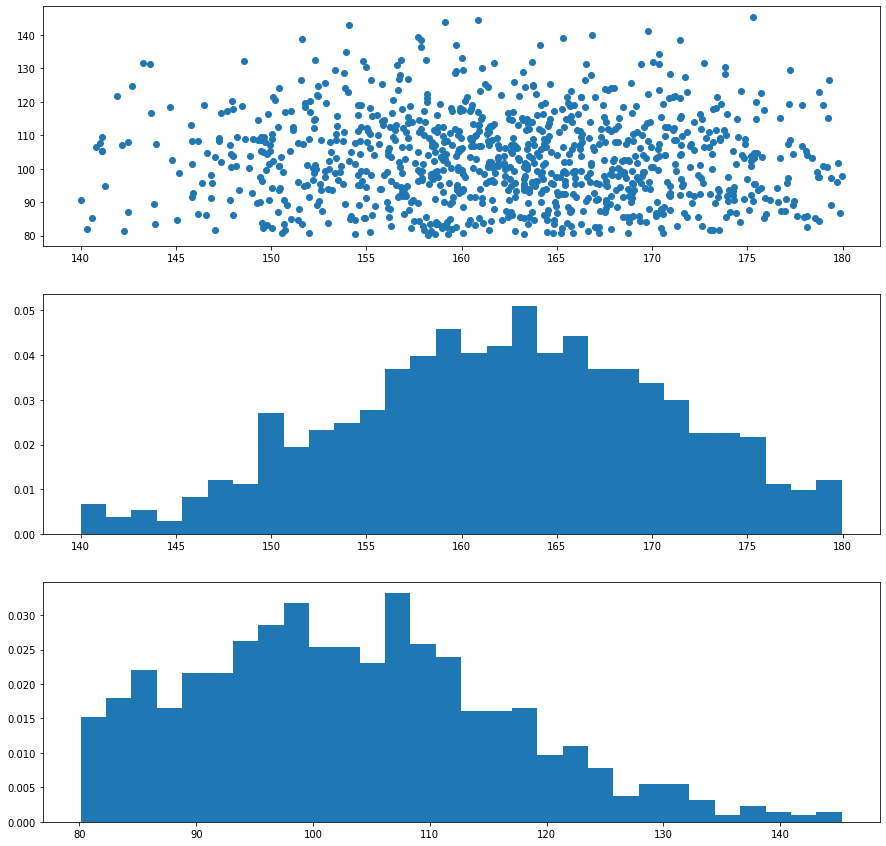

In [110]:
def generate_nd_samples(mu, sigma, lb, ub, N):
  a = (lb - mu)/sigma
  b = (ub - mu)/sigma
  trunc_norm = truncnorm(a, b, loc = mu, scale = sigma)
  
  samples = trunc_norm.rvs(size = (N, 2))
  return samples

nd_mu = np.array([163, 100])
nd_sigma = np.array([10, 15])
nd_lb = np.array([140, 80])
nd_ub = np.array([180, 150])
N = 1000
[samples_x, samples_y] = generate_nd_samples(nd_mu, nd_sigma, nd_lb, nd_ub, N).T

plt.figure(figsize=(15, 15))
ax = plt.subplot(3, 1, 1)
ax.scatter(samples_x, samples_y)

ax = plt.subplot(3, 1, 2)
ax.hist(x = samples_x, bins = 30, density = True)

ax = plt.subplot(3, 1, 3)
ax.hist(x = samples_y, bins = 30, density = True)
plt.show()